In [1]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### 2.1 Read data

In [2]:
# read the data
df = pd.read_csv("student_scores.csv", sep = ',')

In [3]:
df.shape

(25, 2)

In [4]:
# get idea of the look
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# see which are the attribute labels
list(df)

['Hours', 'Scores']

In [6]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 2.2 Get Asquainted with Descriptive Statistics

In [7]:
# get idea of basic statistical parameters for each column
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

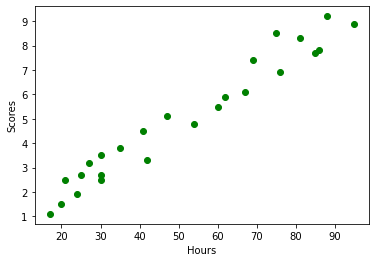

In [9]:
# plot all
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.scatter(df.Scores, df.Hours, color='green')
plt.show()

F:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

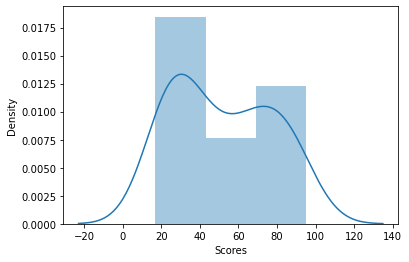

In [10]:
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['Scores'],  label='Scores', norm_hist=True)  

F:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

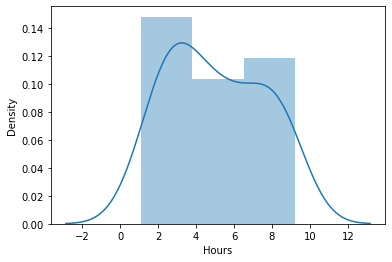

In [11]:
sns.distplot(df['Hours'],  label='Hours', norm_hist=True) 

### 2.4 Investigate the Inter-Dependencies of the Features
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [12]:
corr_matrix = df.corr()
corr_matrix

,Hours,Scores
Hours,1.000,0.976
Scores,0.976,1.000


<AxesSubplot:>

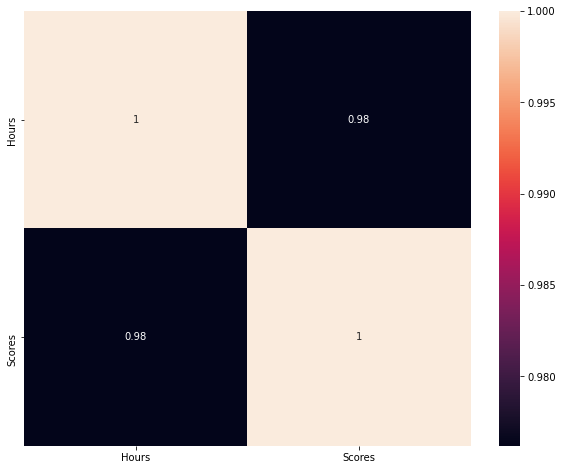

In [13]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

## Step 3: Train a Model

### 3.1 Split the Data in Dependent y and Independent Data Sets

In [14]:
# Split X and y
X, y = df.Hours, df.Scores

In [15]:
X

0    2.500
1    5.100
2    3.200
3    8.500
4    3.500
5    1.500
6    9.200
7    5.500
8    8.300
9    2.700
10   7.700
11   5.900
12   4.500
13   3.300
14   1.100
15   8.900
16   2.500
17   1.900
18   6.100
19   7.400
20   2.700
21   4.800
22   3.800
23   6.900
24   7.800
Name: Hours, dtype: float64

In [16]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

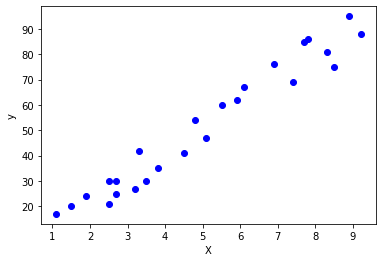

In [17]:
# plot all
plt.ylabel('y')
plt.xlabel('X')
plt.scatter(X, y, color='blue')
plt.show()

### 3.2 Split the Data in Training and Testing Sets

In [18]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4) 

In [19]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15,)
(15,)
(10,)
(10,)


In [20]:
# randomly selected
y_train

20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64

### 3.3 Select a Method, Create a Model

In [21]:
# build a model with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [22]:
# get the result of fitting the regression line on the train data
model

array([10.21834752,  0.13417088])

In [23]:
# apply the model to the test data
test = np.polyfit(X_test, y_test, 1)
test

array([9.08752643, 5.83424947])

## Step 4: Test the Model

### 4.1 Test with Known Data

In [24]:
predict = np.poly1d(model)

In [25]:
y_predicted = predict(X_test)

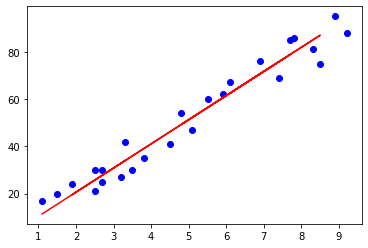

In [26]:
plt.scatter(X, y, color='blue') 
plt.plot(X_test, y_predicted, c = 'r')

In [27]:
y_predicted

array([11.37435315, 33.85471769, 19.54903116, 86.99012477, 49.18223896,
       78.81544676, 62.46609073, 75.7499425 , 35.89838719, 32.83288293])

In [28]:
y_test

14    17
13    42
17    24
3     75
21    54
10    85
18    67
19    69
4     30
2     27
Name: Scores, dtype: int64

In [29]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

6.422945894664214


In [30]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

45.795881407852036


In [31]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

6.767265430574748


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error
- **MSE** is more popular than MAE, because MSE "punishes" larger errors
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units

### Calculate R-squared

In [32]:
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.91


In [33]:
# R-squared
from sklearn.metrics import r2_score
r2_score(y, predict(X))
# r2_score(y_test, y_predicted)

0.9509671501041436

The model tested the algorith to a 0.95~ out of 1, which means it should be around 95% accurate at this point. Which is a good result. Depending on what data you're working with and what type of model and algorithm used, you can improve the R2 Squared by training the model further. One of the methods being, running multiple if not thousands of epochs. 

Exercise 7-4 & 7-5. - Question: How does the three different methods differ and where should each method be utilized?

We use Simple Linear Regression in this exercise cause we are only dealing with one explanatory variable. For 7-4 where Multiple Linear Regression is used, makes sense since we're dealing with more than one explanatory variable. In that case multiple correlated dependent variables are predicted, rather than a single scalar variable. For 7-5 aka. Polynomial Model is used when the latter simply fails to make a optimal fit line (mean) through our data points, which is the case where we have a curvilinear relationship between the dependent and independent variables. 